# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [4]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [5]:
df.shape

(33550, 5)

In [6]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [7]:
ny_df = df[df['state']=='New York']

In [8]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [9]:
ny_df.shape

(611, 5)

In [10]:
ny_df.tail()

,date,state,fips,cases,deaths
33304,2021-10-28,New York,36,2546275,55902
33360,2021-10-29,New York,36,2552009,55942
33416,2021-10-30,New York,36,2555136,55969
33472,2021-10-31,New York,36,2557930,55995
33528,2021-11-01,New York,36,2563625,56044


In [11]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [12]:
#total number of cases
ny_df['cases'].max()

2563625

In [13]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

733511352

Finding new covid 19 cases on daily basis (new cases added everyday)

In [14]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [15]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [17]:
ny_df['new_cases'].sum()

2563625

In [18]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [19]:
type(ny_new_cases)

pandas.core.series.Series

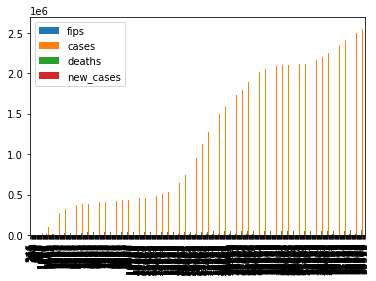

In [20]:
ny_df.plot(kind='bar')

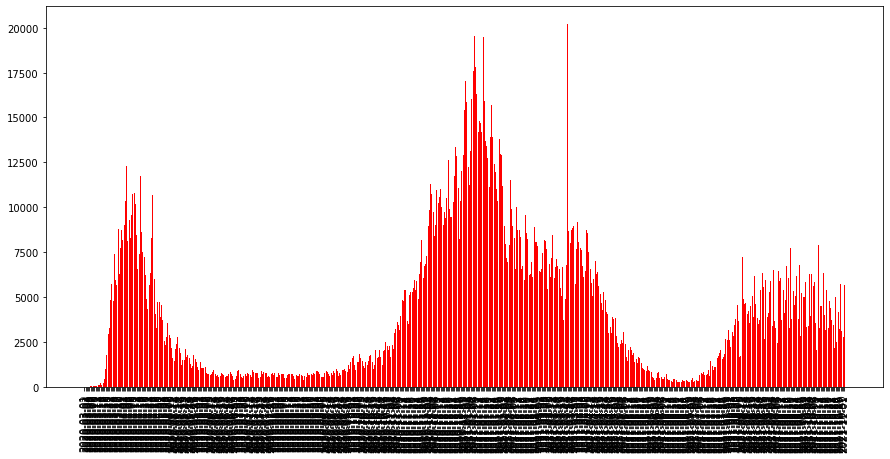

In [21]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [22]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [23]:
# ny_dates_30

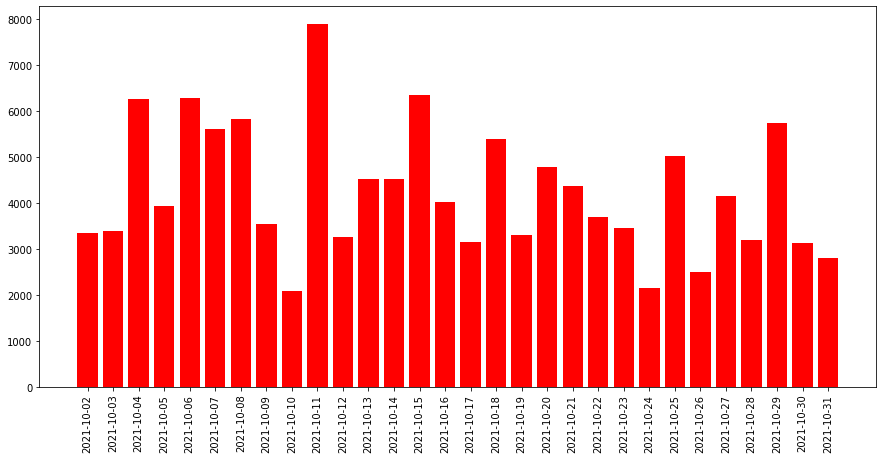

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

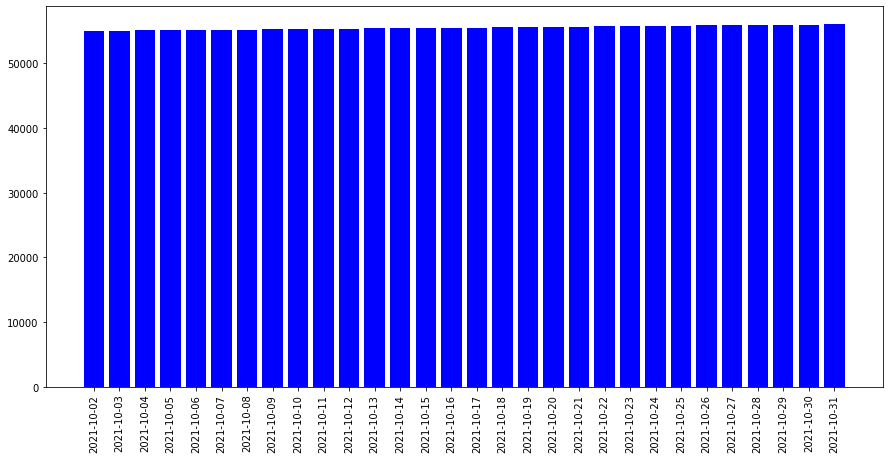

In [25]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [26]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

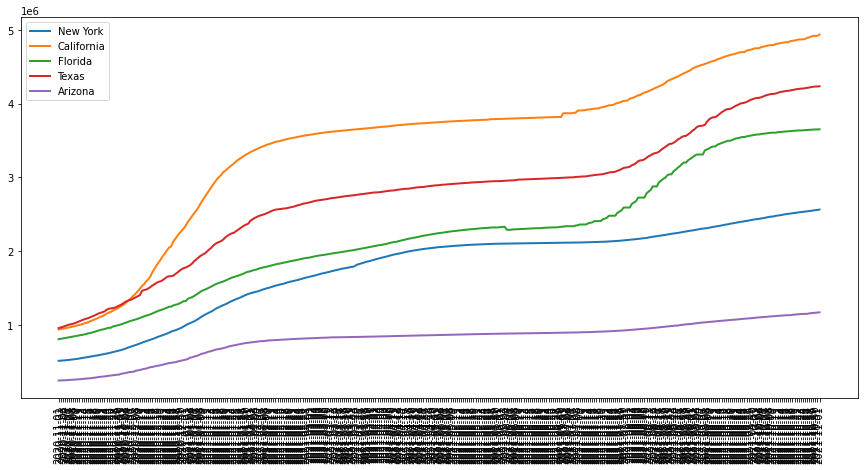

In [27]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Your text here
2.   Conclusion 2
     --Your text here>



In [28]:
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
33545,2021-11-01,Virginia,51,927999,13984
33546,2021-11-01,Washington,53,732810,8717
33547,2021-11-01,West Virginia,54,273030,4450
33548,2021-11-01,Wisconsin,55,887361,9430


In [29]:
xx = df[['date', 'cases', 'state', 'deaths']]

In [32]:
xy = xx.sort_values(by= 'deaths', ascending = False)

In [33]:
xy

,date,cases,state,deaths
33499,2021-11-01,4933895,California,72289
33387,2021-10-30,4916614,California,72144
33443,2021-10-31,4917683,California,72140
33331,2021-10-29,4915206,California,72140
33275,2021-10-28,4908206,California,72026
...,...,...,...,...
668,2020-03-14,13,New Mexico,0
666,2020-03-14,7,New Hampshire,0
665,2020-03-14,21,Nevada,0
32768,2021-10-19,1,American Samoa,0


In [34]:
ca_df = df[df['state']=='California']

In [35]:
ca_df

,date,state,fips,cases,deaths
5,2020-01-25,California,6,1,0
9,2020-01-26,California,6,2,0
13,2020-01-27,California,6,2,0
17,2020-01-28,California,6,2,0
21,2020-01-29,California,6,2,0
...,...,...,...,...,...
33275,2021-10-28,California,6,4908206,72026
33331,2021-10-29,California,6,4915206,72140
33387,2021-10-30,California,6,4916614,72144
33443,2021-10-31,California,6,4917683,72140


In [36]:
ca_death = ca_df[ca_df['deaths']!=0]
ca_death.head()

,date,state,fips,cases,deaths
285,2020-03-04,California,6,55,1
302,2020-03-05,California,6,67,1
323,2020-03-06,California,6,81,1
351,2020-03-07,California,6,100,1
384,2020-03-08,California,6,112,1
